In [1]:
#Audio Classification Using Machine Learning


In [2]:
#!pip install librosa

In [3]:
#importing the libraries
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#getting the path
import os
os.getcwd()

'C:\\Users\\Shubham Buchunde\\Documents\\DL\\Audio-Classification-main'

In [5]:
filename=r'C:\\Users\\Shubham Buchunde\\Documents\\DL\\Audio-Classification-main\\dog_barking_4.wav'

In [6]:
#importing the libraries
import IPython.display as ipd
import librosa
import librosa.display

In [7]:
!dir

 Volume in drive C has no label.
 Volume Serial Number is 2E5F-78EA

 Directory of C:\Users\Shubham Buchunde\Documents\DL\Audio-Classification-main

09/25/2021  06:08 PM    <DIR>          .
09/25/2021  06:08 PM    <DIR>          ..
09/24/2021  11:46 PM    <DIR>          .ipynb_checkpoints
09/25/2021  06:08 PM           551,421 Audio Classification EDA.ipynb
09/21/2019  04:56 AM            51,500 cat_4.wav
09/21/2019  04:56 AM           230,562 dog_barking_4.wav
04/02/2021  12:10 PM            35,149 LICENSE
09/25/2021  05:47 PM           151,110 Part 2- Audio Classification Data Preprocessing And Model Creation.ipynb
09/25/2021  01:08 AM           146,904 Part 2- Audio Classification Data Preprocessing.ipynb
04/02/2021  12:10 PM                22 README.md
09/25/2021  01:00 AM    <DIR>          train
09/21/2019  04:56 AM             4,582 train_test_split.csv
               8 File(s)      1,171,250 bytes
               4 Dir(s)  174,022,004,736 bytes free


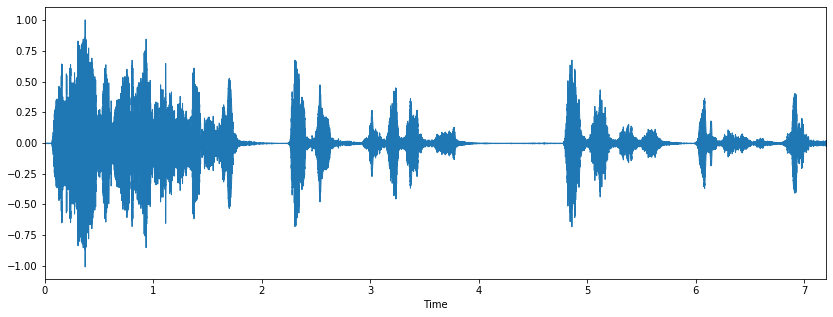

In [8]:
### Plotting and display audio Dog Sound
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

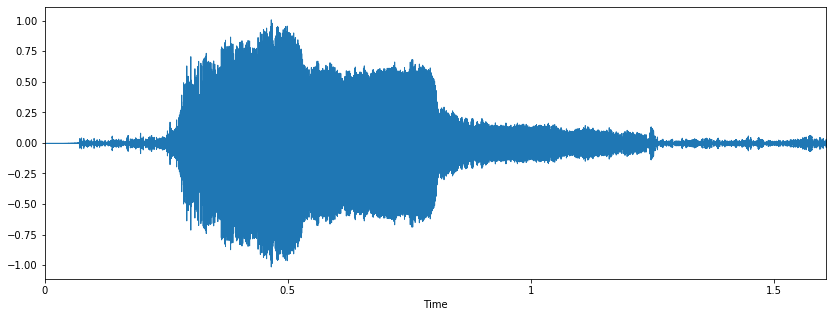

In [9]:
### Plotting and display audio Dog Sound
filename=r'C:\\Users\\Shubham Buchunde\\Documents\\DL\\Audio-Classification-main\\cat_4.wav'
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

In [10]:
#checking the sample rate for librosa
sample_rate


22050

In [11]:
#importing the Scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio=wav.read(filename)

In [12]:
#checking the sample rate for scipy
wave_sample_rate

16000

In [13]:
wave_audio

array([   0,    0,    0, ..., -343, -416, -155], dtype=int16)

In [14]:
data

array([ 0.        ,  0.        ,  0.        , ..., -0.01139749,
       -0.00493222,  0.        ], dtype=float32)

In [15]:
#importing the csv metadata file
import pandas as pd

metadata=pd.read_csv(r'C:\Users\Shubham Buchunde\Documents\DL\Audio-Classification-main\train_test_split.csv',index_col = 0)
metadata.head(10)

,test_cat,test_dog,train_cat,train_dog
0,cat_22.wav,dog_barking_97.wav,cat_99.wav,dog_barking_33.wav
1,cat_116.wav,dog_barking_0.wav,cat_54.wav,dog_barking_86.wav
2,cat_155.wav,dog_barking_93.wav,cat_34.wav,dog_barking_45.wav
3,cat_58.wav,dog_barking_10.wav,cat_132.wav,dog_barking_76.wav
4,cat_77.wav,dog_barking_26.wav,cat_124.wav,dog_barking_4.wav
5,cat_144.wav,dog_barking_28.wav,cat_56.wav,dog_barking_6.wav
6,cat_49.wav,dog_barking_106.wav,cat_86.wav,dog_barking_55.wav
7,cat_38.wav,dog_barking_5.wav,cat_119.wav,dog_barking_58.wav
8,cat_5.wav,dog_barking_94.wav,cat_134.wav,dog_barking_95.wav
9,cat_2.wav,dog_barking_65.wav,cat_130.wav,dog_barking_74.wav


In [16]:
#checking the shape
metadata.shape

(115, 4)

In [17]:
#Concatenating the required dataset
metadata1 = pd.concat([metadata['train_cat'],metadata['train_dog']],axis = 0)

In [18]:
#checking the shape
metadata1.shape

(230,)

In [19]:
#dropping the null values from the dataframe
metadata1 = metadata1.dropna()

In [20]:
metadata1.head(5)

0     cat_99.wav
1     cat_54.wav
2     cat_34.wav
3    cat_132.wav
4    cat_124.wav
dtype: object

In [21]:
#Logic for labelling the individual record in dataset
labels = []
for name in metadata1:
    name = str(name)
    if 'c' in name[0]:
        labels.append(name[:3])
    elif 'd' in name[0]:
        labels.append(name[:3])
print(labels)

len(labels)

['cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog'

179

In [22]:
type(metadata1)

pandas.core.series.Series

In [23]:
metadata1.shape

(179,)

In [24]:
metadata1.head(5)

0     cat_99.wav
1     cat_54.wav
2     cat_34.wav
3    cat_132.wav
4    cat_124.wav
dtype: object

In [25]:
type(metadata1)

pandas.core.series.Series

In [26]:
type(labels)

list

In [27]:
#converting into new dataframe
dataframe = pd.DataFrame(metadata1)
dataframe.shape

(179, 1)

In [28]:
dataframe['labels'] = labels

In [29]:
#Renaming the column name
dataframe = dataframe.rename({
          0:'Audio_file_name'
        }, axis='columns')

In [30]:
dataframe

,Audio_file_name,labels
0,cat_99.wav,cat
1,cat_54.wav,cat
2,cat_34.wav,cat
3,cat_132.wav,cat
4,cat_124.wav,cat
...,...,...
59,dog_barking_9.wav,dog
60,dog_barking_111.wav,dog
61,dog_barking_67.wav,dog
62,dog_barking_108.wav,dog


In [31]:
# read a sample audio using librosa
import librosa
audio_file_path=r'C:\Users\Shubham Buchunde\Documents\DL\Audio-Classification-main\dog_barking_4.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [32]:
print(librosa_audio_data)

[-0.00053162 -0.00050666 -0.00020808 ...  0.01219516  0.01138602
  0.        ]


#### Observation
Here Librosa converts the signal to mono, meaning the channel will alays be 1

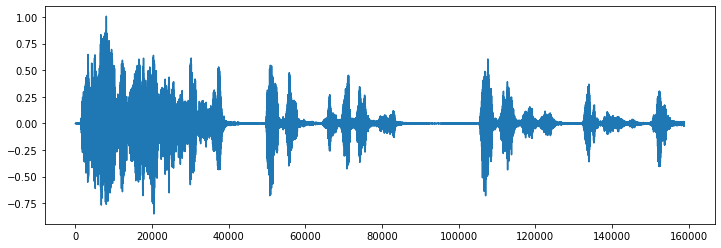

In [33]:
### Plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

### Extract Features
Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio 
samples.
The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [34]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 311)


In [35]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path=r'C:/Users/Shubham Buchunde/Documents/DL/Audio-Classification-main/train/'



In [36]:
#Function for Extracting the features
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [37]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(dataframe.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path)+str(row["Audio_file_name"]))
    #print(file_name)
    
    
    final_class_labels=row["labels"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

179it [00:17, 10.30it/s]


In [38]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-237.81186, 147.8731, -100.09769, -0.18745242...",cat
1,"[-152.5646, 85.146255, -136.19484, 23.120811, ...",cat
2,"[-316.7891, 126.741776, -5.312496, -13.759399,...",cat
3,"[-288.4771, 93.19667, -31.311403, 7.152877, -3...",cat
4,"[-274.62314, 73.78443, -53.000587, 81.18064, -...",cat


In [39]:
extracted_features_df['class']

0      cat
1      cat
2      cat
3      cat
4      cat
      ... 
174    dog
175    dog
176    dog
177    dog
178    dog
Name: class, Length: 179, dtype: object

In [40]:
#### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [41]:
X.shape

(179, 40)

In [42]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical  
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))


In [43]:
y.shape

(179, 2)

In [44]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [45]:
X_train

array([[-3.3299686e+02,  7.0710213e+01,  1.0565494e+01, ...,
         1.4241992e+00,  1.3065659e+00,  1.5970067e+00],
       [-3.0148666e+02,  1.4226724e+02, -6.9439445e+01, ...,
         3.9964004e+00, -2.5980864e-02, -5.0053078e-01],
       [-1.6746425e+02,  1.6592488e+02, -7.3874222e+01, ...,
        -5.7846791e-01, -4.4494581e-01, -2.1672489e-01],
       ...,
       [-2.4878021e+02,  1.7238466e+02, -1.2047576e+01, ...,
        -3.4767258e+00,  1.2241051e+00, -3.8168864e+00],
       [-2.5726047e+02,  1.2515935e+02, -3.2478420e+01, ...,
        -6.3008416e-01, -2.2633567e+00, -8.3782947e-01],
       [-3.0734396e+02,  1.4321561e+02, -9.4481382e+00, ...,
        -2.2298384e+00, -8.5713005e-01,  1.5745742e+00]], dtype=float32)

In [46]:
X_train.shape

(143, 40)

In [47]:
X_test.shape

(36, 40)

In [48]:
y_train.shape

(143, 2)

In [49]:
y_test.shape 

(36, 2)

In [50]:
#importing the tensorflow and getting the tensorflow version
import tensorflow as tf
print(tf.__version__)

2.2.0


In [51]:
#Importing the keras models and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [52]:
### No of classes
num_labels=y.shape[1]
num_labels

2

In [53]:
#Defining the sequential class from keras.models
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [54]:
#getting the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               4100      
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               20200     
_________________________________________________________________
activation_1 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               2

In [55]:
#Compiling the model
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [56]:
## Training the model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
1/5 [=====>........................] - ETA: 0s - loss: 19.6788 - accuracy: 0.5625
Epoch 00001: val_loss improved from inf to 2.95883, saving model to saved_models/audio_classification.hdf5
5/5 [==============================] - 1s 103ms/step - loss: 21.1512 - accuracy: 0.5455 - val_loss: 2.9588 - val_accuracy: 0.3889
Epoch 2/100
1/5 [=====>........................] - ETA: 0s - loss: 24.8401 - accuracy: 0.3125
Epoch 00002: val_loss improved from 2.95883 to 1.90086, saving model to saved_models/audio_classification.hdf5
5/5 [==============================] - 0s 14ms/step - loss: 18.0805 - accuracy: 0.5105 - val_loss: 1.9009 - val_accuracy: 0.5000
Epoch 3/100
1/5 [=====>........................] - ETA: 0s - loss: 19.3515 - accuracy: 0.4375
Epoch 00003: val_loss improved from 1.90086 to 1.55857, saving model to saved_models/audio_classification.hdf5
5/5 [==============================] - 0s 14ms/step - loss: 13.8481 - accuracy: 0.5664 - val_loss: 1.5586 - val_accuracy: 0.6111
E

Epoch 28/100
1/5 [=====>........................] - ETA: 0s - loss: 2.1488 - accuracy: 0.8125
Epoch 00028: val_loss did not improve from 0.63474
5/5 [==============================] - 0s 27ms/step - loss: 1.8027 - accuracy: 0.7413 - val_loss: 0.6524 - val_accuracy: 0.8056
Epoch 29/100
1/5 [=====>........................] - ETA: 0s - loss: 1.6430 - accuracy: 0.7188
Epoch 00029: val_loss did not improve from 0.63474
5/5 [==============================] - 0s 30ms/step - loss: 2.2189 - accuracy: 0.6573 - val_loss: 0.6527 - val_accuracy: 0.8056
Epoch 30/100
1/5 [=====>........................] - ETA: 0s - loss: 1.2099 - accuracy: 0.7500
Epoch 00030: val_loss did not improve from 0.63474
5/5 [==============================] - 0s 32ms/step - loss: 1.5330 - accuracy: 0.6923 - val_loss: 0.6407 - val_accuracy: 0.8056
Epoch 31/100
1/5 [=====>........................] - ETA: 0s - loss: 1.2554 - accuracy: 0.7188
Epoch 00031: val_loss improved from 0.63474 to 0.62654, saving model to saved_models/au

1/5 [=====>........................] - ETA: 0s - loss: 0.7747 - accuracy: 0.7812
Epoch 00055: val_loss improved from 0.51677 to 0.51327, saving model to saved_models/audio_classification.hdf5
5/5 [==============================] - 0s 20ms/step - loss: 0.9970 - accuracy: 0.7413 - val_loss: 0.5133 - val_accuracy: 0.8056
Epoch 56/100
1/5 [=====>........................] - ETA: 0s - loss: 0.7699 - accuracy: 0.7188
Epoch 00056: val_loss improved from 0.51327 to 0.51262, saving model to saved_models/audio_classification.hdf5
5/5 [==============================] - 0s 16ms/step - loss: 0.8254 - accuracy: 0.7203 - val_loss: 0.5126 - val_accuracy: 0.8056
Epoch 57/100
1/5 [=====>........................] - ETA: 0s - loss: 0.9877 - accuracy: 0.6562
Epoch 00057: val_loss did not improve from 0.51262
5/5 [==============================] - 0s 13ms/step - loss: 0.8601 - accuracy: 0.7273 - val_loss: 0.5139 - val_accuracy: 0.8333
Epoch 58/100
1/5 [=====>........................] - ETA: 0s - loss: 1.5396

1/5 [=====>........................] - ETA: 0s - loss: 0.7374 - accuracy: 0.8125
Epoch 00081: val_loss improved from 0.45014 to 0.44943, saving model to saved_models/audio_classification.hdf5
5/5 [==============================] - 0s 21ms/step - loss: 0.5260 - accuracy: 0.8322 - val_loss: 0.4494 - val_accuracy: 0.8333
Epoch 82/100
1/5 [=====>........................] - ETA: 0s - loss: 0.5990 - accuracy: 0.8750
Epoch 00082: val_loss improved from 0.44943 to 0.44483, saving model to saved_models/audio_classification.hdf5
5/5 [==============================] - 0s 22ms/step - loss: 0.4978 - accuracy: 0.8252 - val_loss: 0.4448 - val_accuracy: 0.8333
Epoch 83/100
1/5 [=====>........................] - ETA: 0s - loss: 0.3851 - accuracy: 0.8750
Epoch 00083: val_loss improved from 0.44483 to 0.43881, saving model to saved_models/audio_classification.hdf5
5/5 [==============================] - 0s 15ms/step - loss: 0.4953 - accuracy: 0.8182 - val_loss: 0.4388 - val_accuracy: 0.8333
Epoch 84/100
1

In [57]:
#Calculate the model accuracy

test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.8333333134651184


In [58]:
#Predicting the audio file of user
filename=r"C:\Users\Shubham Buchunde\Documents\DL\archive\cats_dogs\test\cats\cat_158.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict_classes(mfccs_scaled_features)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class

[-1.7690714e+02  1.0388838e+02 -7.9994316e+01  4.8562969e+01
 -5.0372200e+01  2.4367954e+01 -2.3928499e+01  1.2683693e+01
 -5.5008988e+00 -5.7067275e+00  5.0028415e+00 -1.1202489e+01
  1.0487682e+01 -1.9150656e+01 -1.3947703e-01 -1.0179191e+01
  5.4754573e-01  1.3902531e+00  2.7542536e+00  4.3643074e+00
 -8.4077430e-01  5.0400443e+00 -6.2539463e+00  4.3741755e+00
  9.1401279e-02  1.5403571e+00 -3.1943345e+00 -2.9765301e+00
 -1.4923729e+00 -1.6713698e-01 -5.5922908e-01 -6.0778193e+00
  1.1137010e+00 -1.0714667e+00  2.2610111e+00  2.7672404e-03
  7.8842634e-01 -4.8865947e-01 -1.0721080e+00 -9.6372718e-01]
[[-1.7690714e+02  1.0388838e+02 -7.9994316e+01  4.8562969e+01
  -5.0372200e+01  2.4367954e+01 -2.3928499e+01  1.2683693e+01
  -5.5008988e+00 -5.7067275e+00  5.0028415e+00 -1.1202489e+01
   1.0487682e+01 -1.9150656e+01 -1.3947703e-01 -1.0179191e+01
   5.4754573e-01  1.3902531e+00  2.7542536e+00  4.3643074e+00
  -8.4077430e-01  5.0400443e+00 -6.2539463e+00  4.3741755e+00
   9.1401279e-02 

array(['cat'], dtype='<U3')

In [59]:
prediction_class

array(['cat'], dtype='<U3')

In [60]:
#prediction of audio class of test dataset
y_pred=model.predict_classes(X_test)

In [61]:
y_pred

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [62]:
y_test

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [63]:
result =y_test[: , 1]

In [64]:
result

array([1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1.,
       1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1.,
       0., 0.], dtype=float32)

In [65]:
#CONFUSION MATRIX
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(result, y_pred)

print(cm)

[[19  0]
 [ 6 11]]


In [66]:
18+11

29

In [67]:
29/(38)

0.7631578947368421